## ダーツボードの自動得点計算

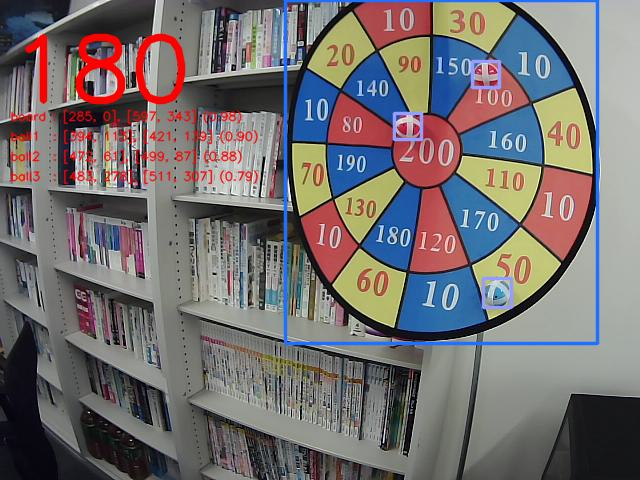

In [1]:
import cv2
import os
import IPython

from io import BytesIO
from PIL import Image

from dartboard_evaluator import DartboardEvaluator


# 画像をjpegバイナリに変換してIpythonで表示する
def show(a, fmt='jpeg'):
    f = BytesIO()
    Image.fromarray(a).save(f, fmt)
    IPython.display.display(IPython.display.Image(data=f.getvalue()))
    IPython.display.clear_output(wait=True)


darts_eval = DartboardEvaluator(yolo_model_path = "./models/20230727-1623_yolov8s_sentan-B_v4/weights/best.pt")

cap = cv2.VideoCapture(0)
assert cap.isOpened(), 'Could not open video device'
try:
    while(True):
        ret, frame = cap.read() 

        if ret:
            frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
            frame = cv2.resize(frame, (640, 480))

            socre = darts_eval(frame)
            frame = darts_eval.get_visualized_img()
            frame = cv2.putText(frame, str(socre), (10, 100), cv2.FONT_HERSHEY_SIMPLEX, 3, (0, 0, 255), 5, cv2.LINE_AA)
            
            count = 0
            for i, box in enumerate(darts_eval.result[0].boxes.data.tolist()):
                bbox_coord = list(map(int, box[0:4]))
                conf = box[4]
                label = int(box[5])

                if label == 1:
                    count += 1
                    label = f"ball{count} "
                elif label == 2:
                    label = "board"

                text = f"{label} : {bbox_coord[:2]}, {bbox_coord[2:4]} ({conf:.2f})"
                frame = cv2.putText(frame, text, (10, 120+(20*i)), cv2.FONT_HERSHEY_SIMPLEX, 0.4, (0, 0, 255), 1, cv2.LINE_AA)

            show(frame)

except KeyboardInterrupt:
    cap.release()
    print('Stream stopped')